In [2]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.6+ (default, Jun 18 2020, 15:34:21) 
[GCC 4.2.1 Compatible Apple LLVM 11.0.3 (clang-1103.0.32.62)]
scipy: 1.4.0
numpy: 1.16.4
matplotlib: 3.1.1
pandas: 1.0.3
sklearn: 0.23.1


In [3]:
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = [
    'id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion'
    ,'single_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class'
]
df = pd.read_csv(url,names=names)

In [5]:
# Preprocess the data
df.replace('?',-99999,inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

# Print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [6]:
print(df.loc[6])

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromatin            3
normal_nucleoli            1
mitoses                    1
class                      2
Name: 6, dtype: object


In [7]:
print(df.loc[6])
print(df.describe())

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromatin            3
normal_nucleoli            1
mitoses                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000        

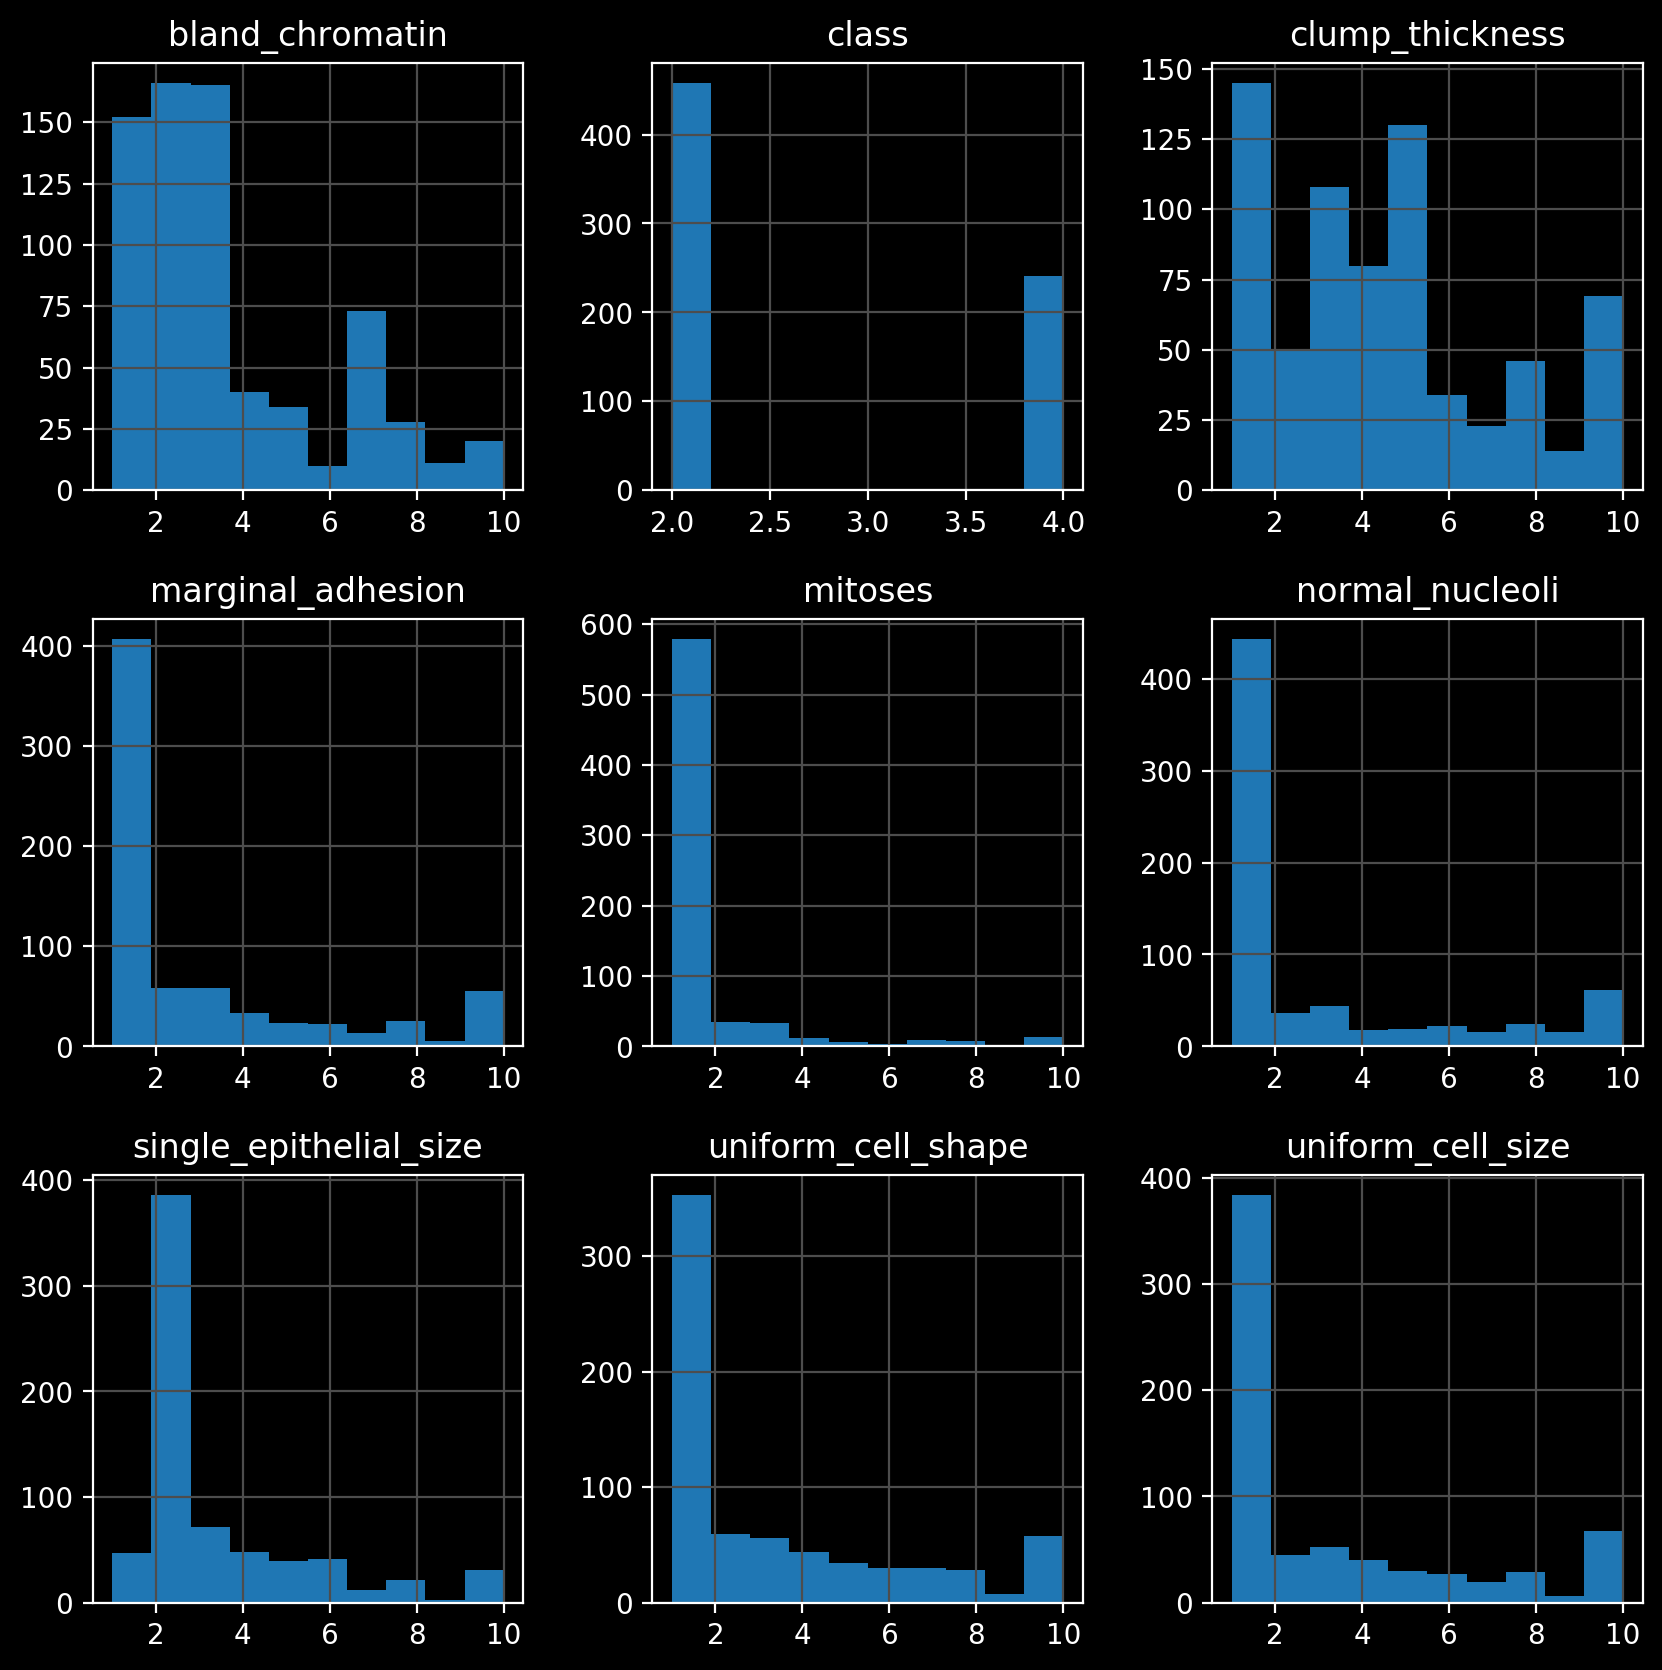

In [8]:
# Plot histograms for each variable
df.hist(figsize=(10,10))
plt.show()

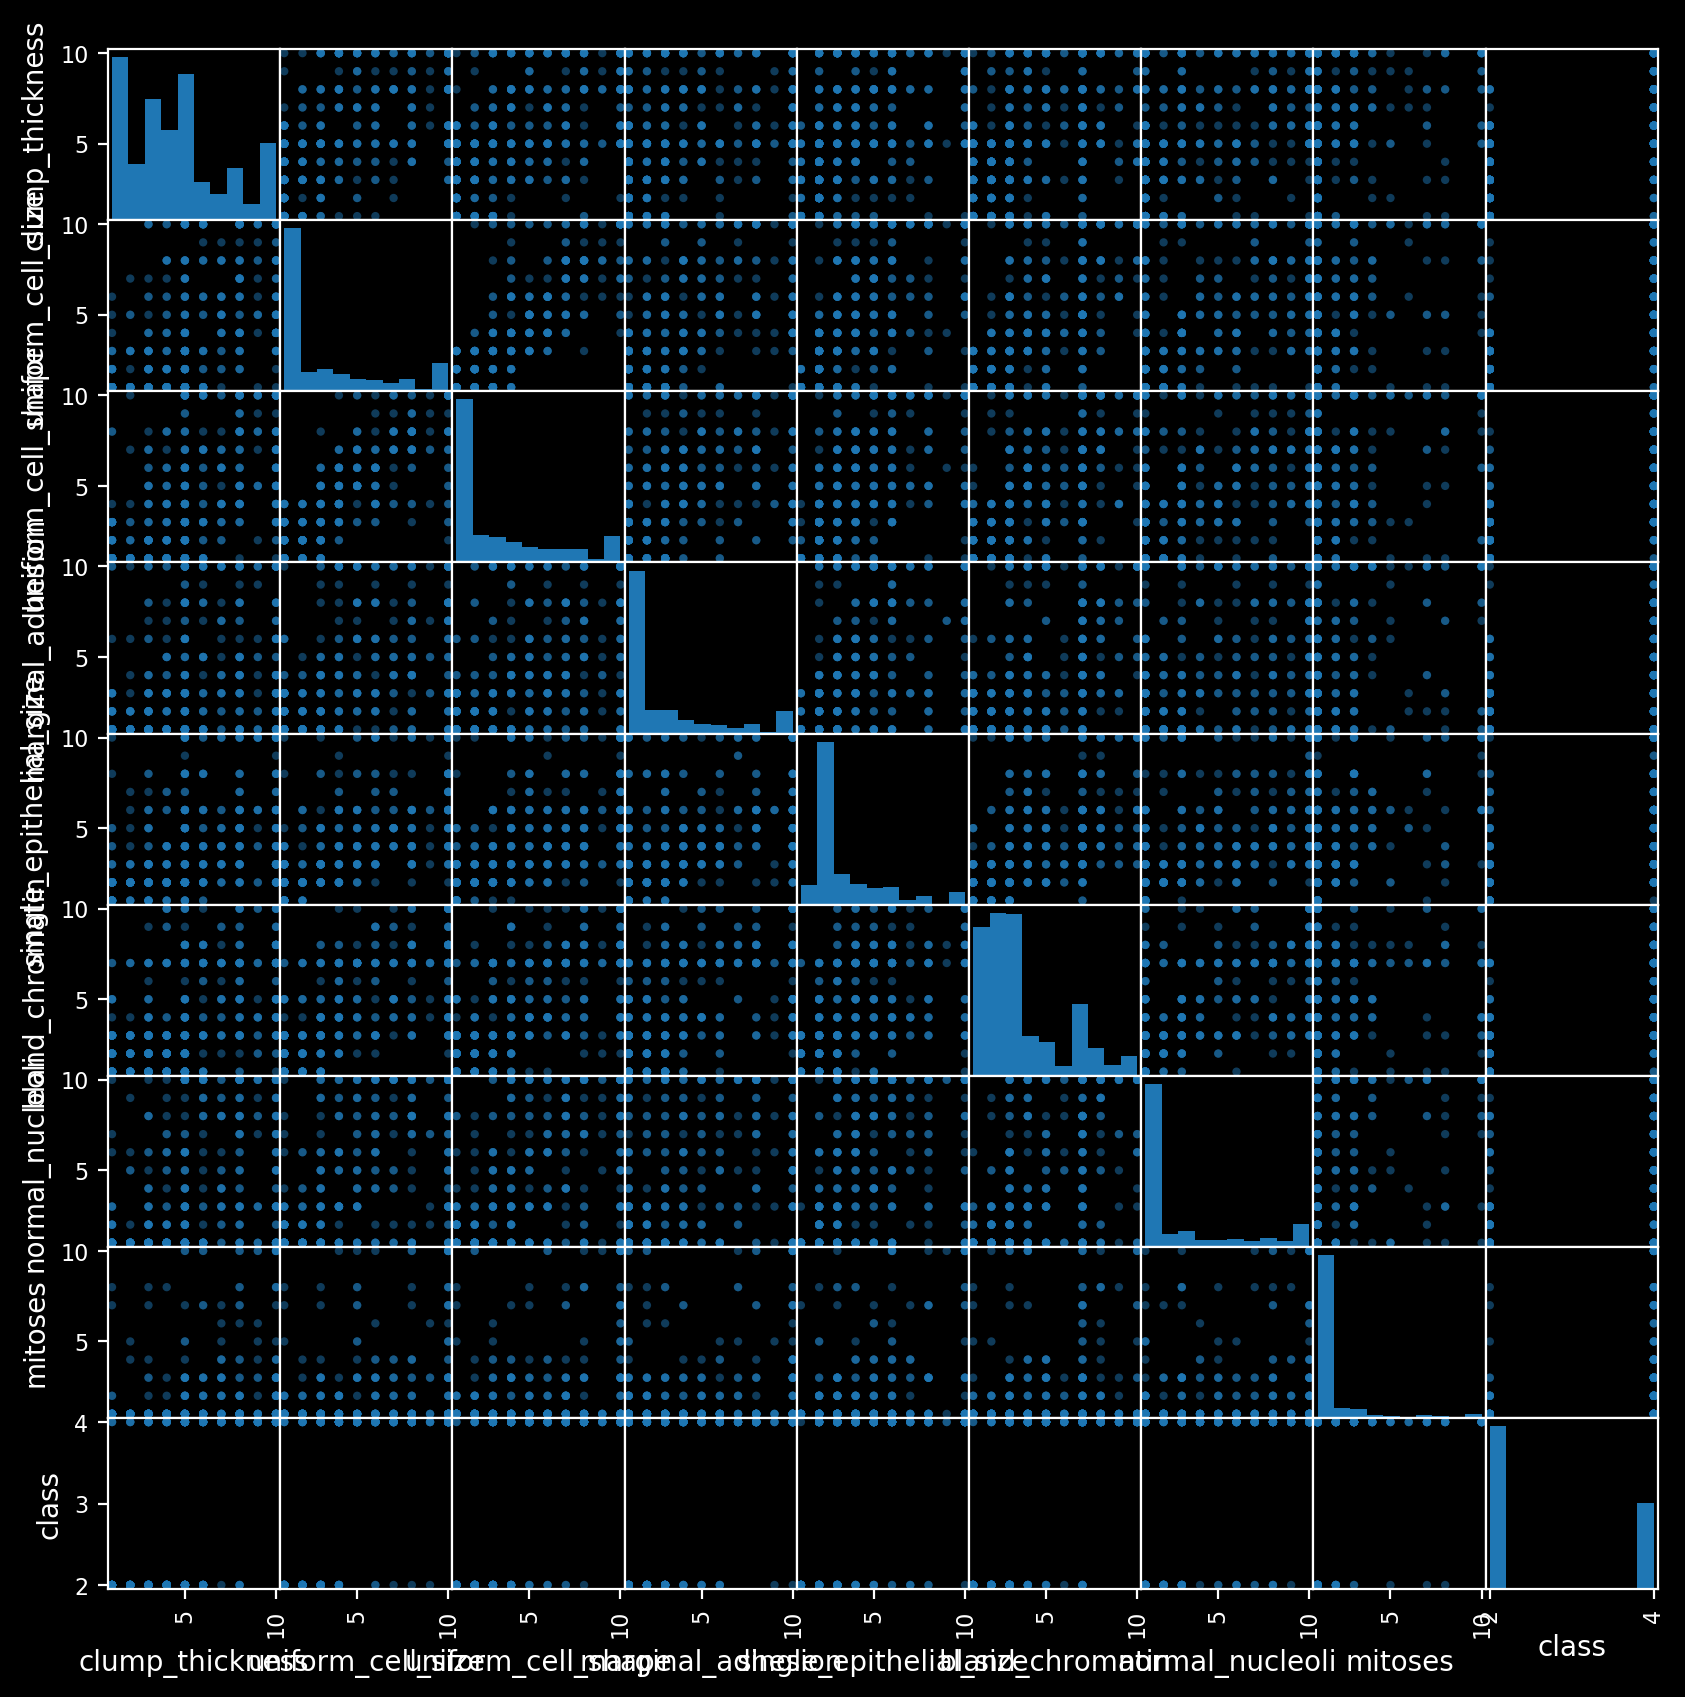

In [9]:
# Create scatter plot matrix
scatter_matrix(df, figsize=(10,10))
plt.show()

In [10]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [11]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [12]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

# evaluate each modelin turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/var/mobile/Containers/Data/Application/976D8CF8-16A7-4150-B014-4566B988C1B3/Library/Application Support/com.rationalmatter.junoapp/python-home/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.962435 (0.020277)


/var/mobile/Containers/Data/Application/976D8CF8-16A7-4150-B014-4566B988C1B3/Library/Application Support/com.rationalmatter.junoapp/python-home/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.652890 (0.061277)


In [15]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        93
           4       0.96      0.98      0.97        47

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.6642857142857143
              precision    recall  f1-score   support

           2       0.66      1.00      0.80        93
           4       0.00      0.00      0.00        47

    accuracy                           0.66       140
   macro avg       0.33      0.50      0.40       140
weighted avg       0.44      0.66      0.53       140



/var/mobile/Containers/Data/Application/976D8CF8-16A7-4150-B014-4566B988C1B3/Library/Application Support/com.rationalmatter.junoapp/python-home/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.6642857142857143
[2]
